<a href="https://colab.research.google.com/github/mishraShraddha/LGMVIP-Data-science/blob/main/Task3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name** **:** **Shraddha** **Mishra**<br>
**Task** **3**: **Exploratory** **Data** **Analysis** **on** **Terrorist** **Dataset** <br>
     **Lets** **Grow** **More** **Data** **Science** **Internship**

**Importing** **required** **Libraries**

In [31]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

**Loading** **and** **Reading** **the** **Dataset**

In [32]:
df=pd.read_csv("terrorist_data.csv",encoding="latin1")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [33]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.997500e+04,29974.000000,29974.000000,29974.000000,29974.000000,29974.000000,29974.000000,28397.000000,2.839700e+04,29974.000000,29974.000000,29974.000000,29974.000000,29974.000000,29974.000000,5056.000000,29974.000000,29974.000000,29974.000000,29974.000000,38.000000,2.000000,29974.000000,28408.000000,29817.000000,373.000000,279.000000,336.000000,62.000000,45.000000,61.000000,0.0,29974.000000,73.000000,11.000000,29974.000000,5276.000000,1092.000000,1096.000000,278.000000,19.000000,18.000000,8.0,8.000000,33.000000,29974.000000,24542.000000,2092.000000,1751.000000,339.000000,293.000000,65.000000,60.000000,24447.000000,1960.000000,2107.000000,22698.000000,1915.000000,1850.000000,29974.000000,13088.000000,6.137000e+03,29803.000000,2216.000000,2216.000000,630.000000,430.000000,29647.000000,4.970000e+02,1.0,1.090000e+02,2.0,852.000000,644.000000,29974.000000,29974.000000,29974.000000,29974.000000
mean,1.980791e+11,1980.792086,6.350404,15.175952,0.016614,160.690498,5.141222,19.813379,-3.067458e+03,1.385734,0.023287,0.992026,0.992961,0.850971,-1.304531,1.152097,0.073564,0.918863,0.000934,3.139187,4.763158,3.000000,7.449156,43.585363,131.047154,9.042895,47.390681,171.407738,6.354839,40.244444,137.573770,NaN,0.053847,0.219178,0.090909,0.001735,3.651440,-75.500916,-0.060219,4.607914,0.947368,5.611111,1.0,8.000000,0.272727,6.633215,10.621343,6.443595,9.830954,6.578171,9.617747,6.292308,10.266667,2.194380,0.306122,0.633128,1.712221,0.793734,0.074595,0.698706,3.497249,2.676960e+05,0.074355,2.678249,0.123646,24.317460,36.625581,0.016933,3.490094e+06,20000.0,1.119712e+06,0.0,2.954225,10.520186,-3.280943,-3.235337,0.181290,-2.434877
std,1.214180e+09,4.065549,3.398355,8.881986,0.127824,149.993758,3.231156,25.440026,5.114460e+05,1.076467,0.150816,0.088940,0.083607,0.356123,3.424153,0.445227,0.261064,0.273050,0.030550,1.943685,2.476203,1.414214,6.606978,32.281066,75.017245,6.828410,29.212224,107.492188,5.942613,28.494940,75.283787,NaN,0.225719,0.416552,0.301511,0.041616,78.646443,42.718302,1.749110,3.121061,0.229416,3.821593,0.0,2.828427,0.452267,2.438005,7.156400,1.906011,6.957995,2.159798,7.819275,1.528102,7.837041,9.497849,5.571491,3.189296,11.478994,17.436068,0.393089,0.701981,0.525349,7.259924e+06,0.262352,459.705067,3.903354,152.748747,183.365600,0.129021,4.525213e+07,NaN,4.386958e+06,0.0,1.362247,35.931219,4.422357,4.477072,0.764082,4.371263
min,1.980000e+02,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,7.000000,6.000000,NaN,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.979013e+11,1979.000000,3.000000,8.000000,0.000000,61.000000,2.000000,6.313712,-8.304792e+01,1.000000,0.000000,1.000000,1.000000,1.

In [34]:
df.shape

(29975, 135)

In [35]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29975 entries, 0 to 29974
Columns: 135 entries, eventid to related
dtypes: float64(77), int64(1), object(57)
memory usage: 30.9+ MB


**Cleaning** **the** **Data**

In [37]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970.0,1.0,0.0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970.0,1.0,0.0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [38]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [39]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970.0,7.0,2.0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970.0,0.0,0.0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970.0,1.0,0.0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970.0,1.0,0.0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970.0,1.0,0.0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [54]:
df.tail()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
29970,1987.0,1.0,15.0,Philippines,Southeast Asia,Metropolitian Manila,Manila,14.596051,120.978666,NaN,NaN,Bombing/Explosion,Terrorists/Non-State Militia,Moro Islamic Liberation Front (MILF),NaN,Explosives,0.0,0.0,NaN,0.0
29971,1987.0,1.0,15.0,Philippines,Southeast Asia,Metropolitian Manila,Manila,14.596051,120.978666,NaN,NaN,Bombing/Explosion,Terrorists/Non-State Militia,Moro Islamic Liberation Front (MILF),NaN,Firearms,1.0,12.0,NaN,13.0
29972,1987.0,1.0,16.0,Peru,South America,Lima,Lima,-11.967368,-76.978462,NaN,NaN,Unknown,Journalists & Media,Shining Path (SL),NaN,Unknown,0.0,0.0,NaN,0.0
29973,1987.0,1.0,16.0,El Salvador,Central America & Caribbean,Ahuachapan,Ahuachapan,13.921389,-89.845000,NaN,NaN,Armed Assault,Transportation,Farabundo Marti National Liberation Front (FMLN),NaN,Firearms,0.0,4.0,NaN,4.0
29974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0


In [40]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [41]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970.0,651
1971.0,471
1972.0,568
1973.0,473
1974.0,581


**Visualization**

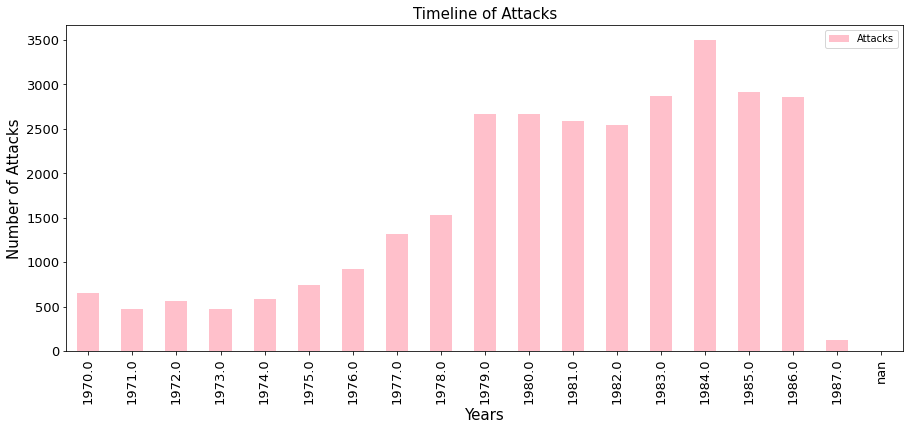

In [55]:
attacks.plot(kind="bar",color="pink",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [43]:
total_case=df[["Year","Casualty"]].groupby("Year").sum()
total_case.head()

,Casualty
Year,
1970.0,386.0
1971.0,255.0
1972.0,975.0
1973.0,865.0
1974.0,1404.0


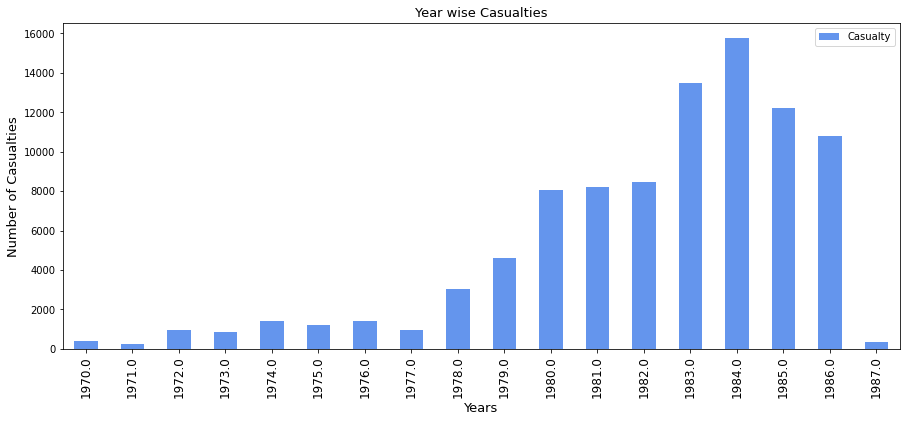

In [44]:
total_case.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

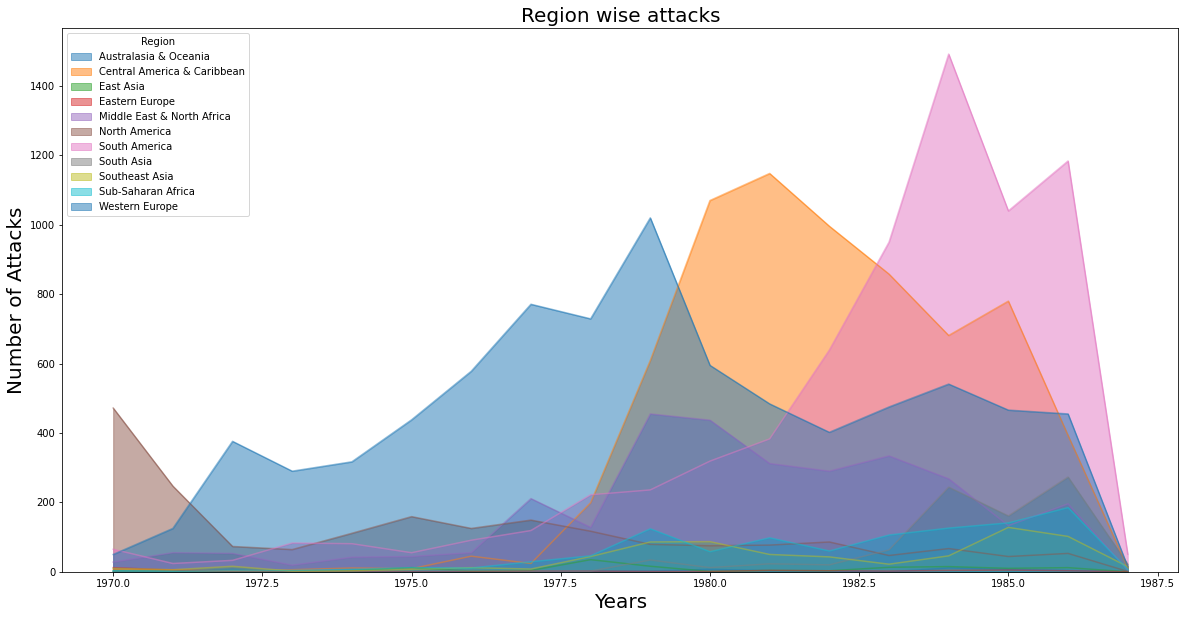

In [45]:
reg=pd.crosstab(df.Year,df.Region)
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [46]:
ct=df["Country"].value_counts().head(10)
ct

El Salvador       3616
Peru              2671
United Kingdom    2503
Colombia          2123
United States     1891
Spain             1848
Nicaragua         1467
Guatemala         1440
Chile             1312
Italy             1262
Name: Country, dtype: int64

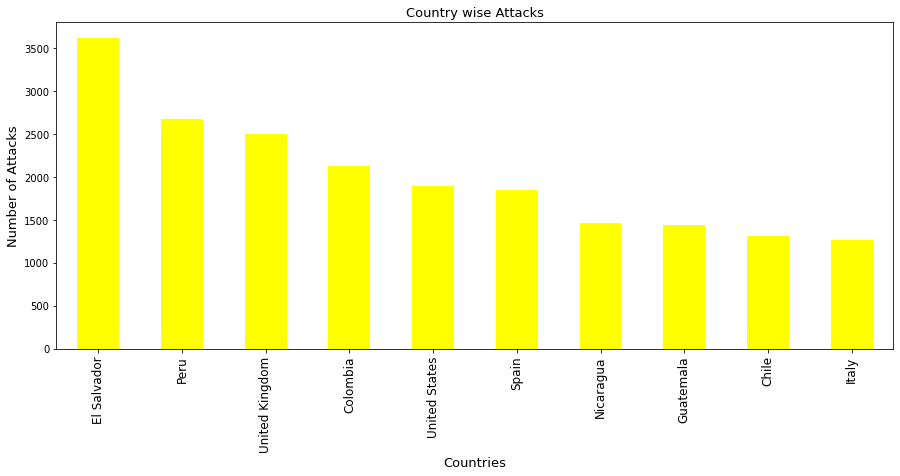

In [56]:
ct.plot(kind="bar",color="yellow",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

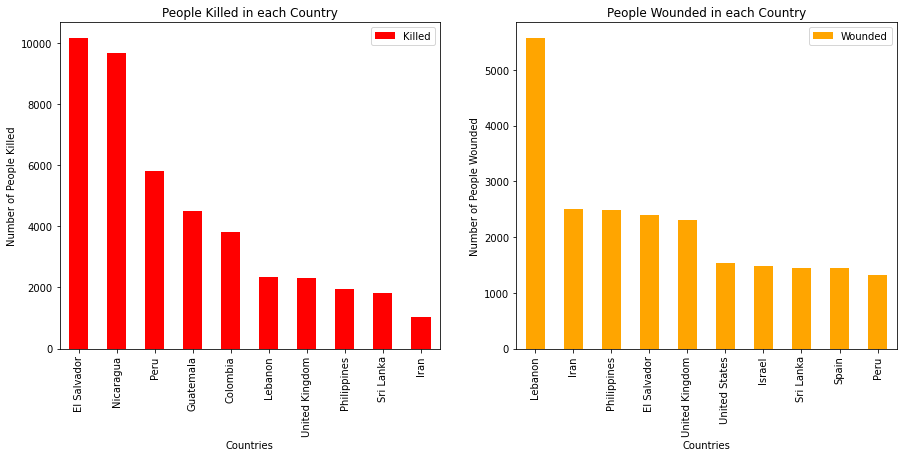

In [57]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="orange",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [49]:
grp=df["Group Name"].value_counts()[1:10]
grp

Shining Path (SL)                                   2027
Farabundo Marti National Liberation Front (FMLN)    1777
Irish Republican Army (IRA)                         1630
Basque Fatherland and Freedom (ETA)                 1125
Nicaraguan Democratic Force (FDN)                    816
M-19 (Movement of April 19)                          511
Palestinians                                         475
Revolutionary Armed Forces of Colombia (FARC)        472
African National Congress (South Africa)             335
Name: Group Name, dtype: int64

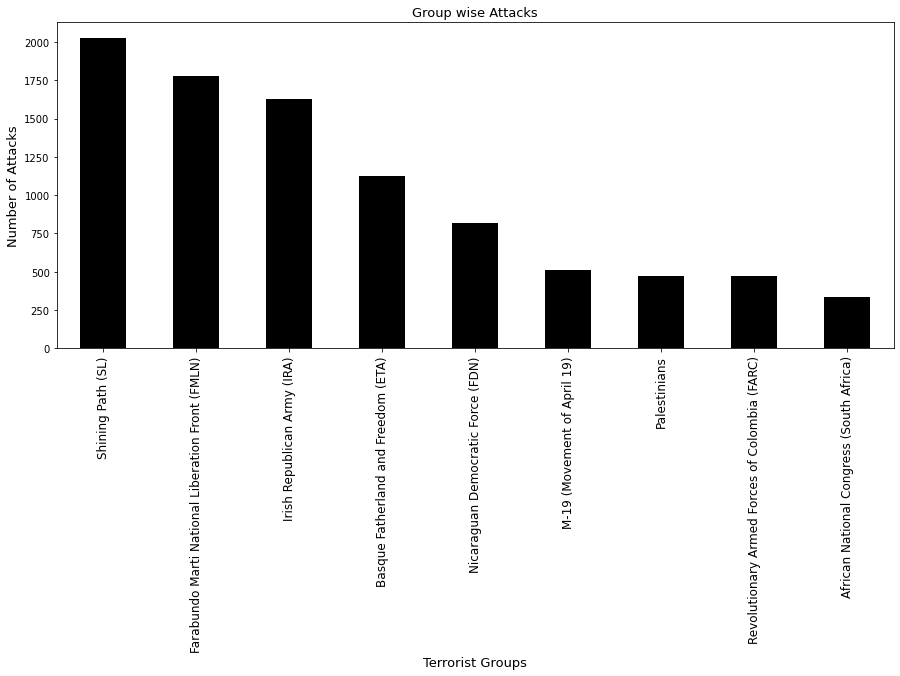

In [58]:
grp.plot(kind="bar",color="black",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [51]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)


Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 92510.0


In [52]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 53646.0


In [53]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 38864.0
